In [1]:
import numpy as np
import torch
import os
from Code.data_prep import Data,XDataset
from Code.network import CNN
import Code.loss2 as ls
from numpy import linalg as LA
import matplotlib.pyplot as plt

torch.set_default_tensor_type('torch.FloatTensor')
# set up default cuda device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### 1) Data Preparation

In [2]:
#Train data
train_ape = Data(root_path="./dataset/", mode="train", label="ape")
train_benchvise = Data(root_path="./dataset/", mode="train", label="benchvise")
train_cam = Data(root_path="./dataset/", mode="train", label="cam")
train_cat = Data(root_path="./dataset/", mode="train", label="cat")
train_duck = Data(root_path="./dataset/", mode="train", label="duck")

#Test data
test_ape = Data(root_path="./dataset/", mode="test", label="ape")
test_benchvise = Data(root_path="./dataset/", mode="test", label="benchvise")
test_cam = Data(root_path="./dataset/", mode="test", label="cam")
test_cat = Data(root_path="./dataset/", mode="test", label="cat")
test_duck = Data(root_path="./dataset/", mode="test", label="duck")

# Template set
db_ape = Data(root_path="./dataset/", mode="database", label="ape")
db_benchvise = Data(root_path="./dataset/", mode="database", label="benchvise")
db_cam = Data(root_path="./dataset/", mode="database", label="cam")
db_cat = Data(root_path="./dataset/", mode="database", label="cat")
db_duck = Data(root_path="./dataset/", mode="database", label="duck")

In [3]:
classes = ["ape", "benchvise", "cam", "cat", "duck"]
train_data = {"ape":train_ape, "benchvise":train_benchvise, "cam":train_cam, "cat":train_cat, "duck":train_duck}
test_data = {"ape":test_ape, "benchvise":test_benchvise, "cam":test_cam, "cat":test_cat, "duck":test_duck}
db_data = {"ape":db_ape, "benchvise":db_benchvise, "cam":db_cam, "cat":db_cat, "duck":db_duck}
classNum =len(classes)

In [4]:
db_imgs =[]
db_pose =[]
db_labels = []
test_imgs =[]
test_pose =[]
test_labels = []

for name in classes:
    for i in range(len(db_data[name])):
        img,pose = db_data[name][i]
        db_imgs.append(img)
        db_pose.append(pose)
        db_labels.append(name)

for name in classes:
    for i in range(len(test_data[name])):
        img,pose = test_data[name][i]
        test_imgs.append(img)
        test_pose.append(pose)
        test_labels.append(name)
db_imgs =np.array(db_imgs)

### 2) CNN

In [5]:
def getHistogram(inference):
    hist =np.zeros((1,4))
    
    for i in range(len(inference)):
        x= inference[i]
        if(np.isnan(x)):
            continue
        elif(x<10):    
            hist+=np.array([1,1,1,1])
        elif(x<20):    
            hist+=np.array([0,1,1,1])
        elif(x<40):    
            hist+=np.array([0,0,1,1])
        elif(x<180):    
            hist+=np.array([0,0,0,1])
        else:
            print('Error')
    print(hist)
    return hist

START TRAIN
7
iteration 0: Loss = 261.78769022226334
Correct matches:  1302
[[ 162.  464.  849. 1302.]]


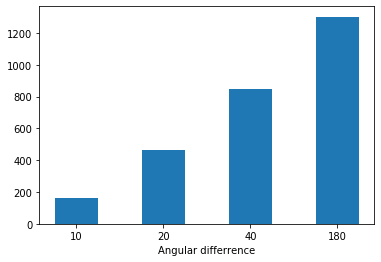

Epoch 0: Loss = 0.15833745160310514
iteration 10: Loss = 67.95808486640453
Epoch 1: Loss = 0.06685798521141681
iteration 20: Loss = 44.750913977622986
Epoch 2: Loss = 0.04583590567755908
Epoch 3: Loss = 0.03807651134337387
iteration 30: Loss = 30.351419001817703
Epoch 4: Loss = 0.028691285872765284
iteration 40: Loss = 27.849099598824978
Epoch 5: Loss = 0.025085767304712174
Epoch 6: Loss = 0.023916167515826176
iteration 50: Loss = 25.725102983415127
Epoch 7: Loss = 0.02323692490942248
iteration 60: Loss = 23.820550180971622
Epoch 8: Loss = 0.019466825229525163
Epoch 9: Loss = 0.0178974167714845
iteration 70: Loss = 26.153912767767906
Epoch 10: Loss = 0.019158873012808834
iteration 80: Loss = 22.29369292035699
Epoch 11: Loss = 0.019002772658902354
iteration 90: Loss = 17.18153664842248
Epoch 12: Loss = 0.015631536302294465
Epoch 13: Loss = 0.01645339200126006
iteration 100: Loss = 18.336131237447262
Correct matches:  2931
[[ 903. 1676. 2200. 2931.]]


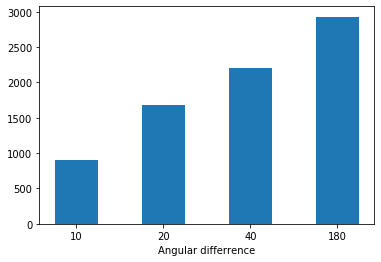

Epoch 14: Loss = 0.016393480730632282
iteration 110: Loss = 15.900301281362772
Epoch 15: Loss = 0.0165057348453419
Epoch 16: Loss = 0.01704776835685079
iteration 120: Loss = 16.70078979805112
Epoch 17: Loss = 0.016007948085756257
iteration 130: Loss = 14.028229750692844
Epoch 18: Loss = 0.01543940300880293
Epoch 19: Loss = 0.01521115603175701
iteration 140: Loss = 15.442666132003069
Epoch 20: Loss = 0.016370501713846117
iteration 150: Loss = 12.8624914214015
Epoch 21: Loss = 0.015307357377554419
iteration 160: Loss = 14.989119954407215
Epoch 22: Loss = 0.015602022683616427
Epoch 23: Loss = 0.016109723406595448
iteration 170: Loss = 17.448649741709232
Epoch 24: Loss = 0.014860187088070811
iteration 180: Loss = 20.49621194601059
Epoch 25: Loss = 0.015240165755243257
Epoch 26: Loss = 0.015703628970351595
iteration 190: Loss = 24.48323741555214
Epoch 27: Loss = 0.01586720568758664
iteration 200: Loss = 15.945497900247574
Correct matches:  2996
[[1007. 1779. 2241. 2996.]]


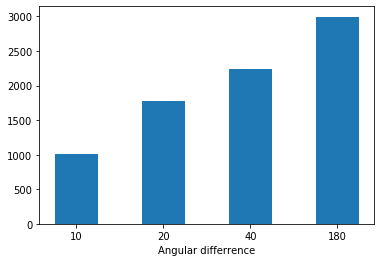

Epoch 28: Loss = 0.01407705274442617
Epoch 29: Loss = 0.01239696345282599
iteration 210: Loss = 15.399351250380278
Epoch 30: Loss = 0.014521606872707182
iteration 220: Loss = 13.911362271755934
Epoch 31: Loss = 0.015401840272845649
iteration 230: Loss = 16.472835559397936
Epoch 32: Loss = 0.016357641350188665
Epoch 33: Loss = 0.015136586617902273
iteration 240: Loss = 13.401375152170658
Epoch 34: Loss = 0.01427340736281904
iteration 250: Loss = 13.711585197597742
Epoch 35: Loss = 0.014113461954681395
Epoch 36: Loss = 0.014934600390629701
iteration 260: Loss = 14.196623582392931
Epoch 37: Loss = 0.01800393995091289
iteration 270: Loss = 18.668577075004578
Epoch 38: Loss = 0.015267192157819253
Epoch 39: Loss = 0.014863394774310416
iteration 280: Loss = 17.20071444287896
Epoch 40: Loss = 0.016214327313192063
iteration 290: Loss = 21.38705737888813
Epoch 41: Loss = 0.01499326673262752
iteration 300: Loss = 21.514648105949163
Correct matches:  2998
[[ 999. 1764. 2247. 2998.]]


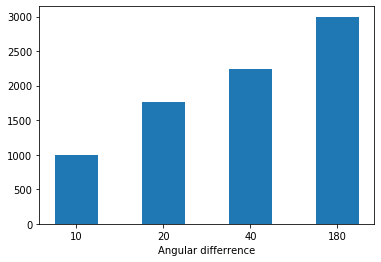

Epoch 42: Loss = 0.018077663533958045
Epoch 43: Loss = 0.013766999769601204
iteration 310: Loss = 16.174708027392626
Epoch 44: Loss = 0.013366235378603932
iteration 320: Loss = 12.919210363179445
Epoch 45: Loss = 0.012674858726958501
Epoch 46: Loss = 0.014346857963332366
iteration 330: Loss = 20.884957630187273
Epoch 47: Loss = 0.015083545093235335
iteration 340: Loss = 12.07120344042778
Epoch 48: Loss = 0.014183564793260656
Epoch 49: Loss = 0.01631759253005415


In [6]:
from torch.utils.tensorboard import SummaryWriter

model = CNN()
optim_args = {"lr": 1e-3, "weight_decay": 0.001}
optimizer = torch.optim.Adam(model.parameters(), **optim_args)
writer = SummaryWriter()

model.to(device)

batch_size = 1000
epochs = 50

dataset=XDataset(classes, train_data, db_data, batch_size)
print("START TRAIN")
iterationPerEpoch = int(dataset.len/batch_size)
print(iterationPerEpoch)
it = 0
store_loss = []
store_ang_diff = []
for i in range(epochs):
    running_loss = 0
    for j in range(iterationPerEpoch):
        model.train()
        optimizer.zero_grad()
        batches_img, batches_pose = dataset.batch_generator()
        inputs = batches_img
        inputs = torch.from_numpy(inputs).to(device, dtype=torch.float)
        outputs = model.forward(inputs)
        
        loss = ls.total_loss(outputs)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data.item() * inputs.shape[0]
        
        if(it%10==0):
            store_loss.append(loss.data.item()*inputs.shape[0])
            print("iteration " +str(it)+ ": Loss = "+ str(loss.data.item()*inputs.shape[0]))
            writer.add_scalar("Loss", loss.data.item()*inputs.shape[0], it)
            
        if(it%100==0):
            model.eval()
            db_inputs = torch.from_numpy(db_imgs).to(device, dtype=torch.float)
            db_outputs = model.forward(db_inputs)
            diffAng = []
            correct_match = 0
            
            for k in range(len(test_imgs)):
                img = test_imgs[k]
                label = test_labels[k]
                pose = test_pose[k]
                
                img_input = torch.from_numpy(np.expand_dims(img, axis=0)).to(device, dtype=torch.float)
                img_output = model(img_input)
                
                vec = torch.norm(db_outputs-img_output, p=2, dim=1).detach().cpu().numpy()
                ind = np.argmin(vec)
                imgInferClass = db_labels[ind]
                dbimgInferPose = db_pose[ind]
                
                if(label == imgInferClass):
                    correct_match += 1
                    quatDot = abs(np.dot(dbimgInferPose, pose))
                    
                    if(quatDot>1.0):
                        quatDot = 1.0
                        
                    diffAng.append(np.degrees(np.arccos(quatDot)))
                else:
                    diffAng.append(np.nan)
                    
            print("Correct matches: ", correct_match)
            histo = getHistogram(diffAng)
            plt.bar(np.array([100,200,300,400]), width=50, height=[histo[0,0],histo[0,1],histo[0,2],histo[0,3]], 
                    tick_label=("10", "20", "40", "180"))
            plt.xlabel('Angular differrence')
            plt.savefig("Histo_%d" % it, dpi=600)
            plt.show()
            
            store_ang_diff.append(diffAng)
            
        it+=1    
    
    epoch_loss = running_loss / (dataset.len)
    print("Epoch "+str(i)+": Loss = "+str(epoch_loss))
    writer.add_scalar("Epoch loss", epoch_loss, i)
    
writer.close()

## Save model

In [6]:
model_name = "models/train_50epochs_working_1000batch"
# model.save(model_name)

In [8]:
# # Test
# dataset=XDataset(classes, train_data, db_data, 10)
# x,y =dataset.batch_generator()
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# fig = plt.figure()
# print(x.shape)
# plt.subplot(2, 2, 1)
# plt.imshow(x[0, 0], 'gray')

# plt.subplot(2, 2, 2)
# plt.imshow(x[0, 1], 'gray')

# plt.subplot(2, 2, 3)
# plt.imshow(x[0, 2], 'gray')
# plt.show()
# dataset.len

## Additional visualizations

In [7]:
model = CNN()
model = torch.load(model_name)

features = []
images = torch.zeros((len(test_imgs), 3, 64, 64)).cuda()


for k in range(len(test_imgs)):
    img = test_imgs[k]
    img_input = torch.from_numpy(np.expand_dims(img, axis=0)).to(device, dtype=torch.float)
    img_output = model(img_input)
    img_output = img_output.squeeze(0)
    img_input = img_input.squeeze(0)
    
    features.append(img_output.detach().cpu().numpy())
    images[k] = img_input

features = np.array(features)

writer = SummaryWriter()
writer.add_embedding(features, metadata=test_labels, label_img=images)
writer.close()

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

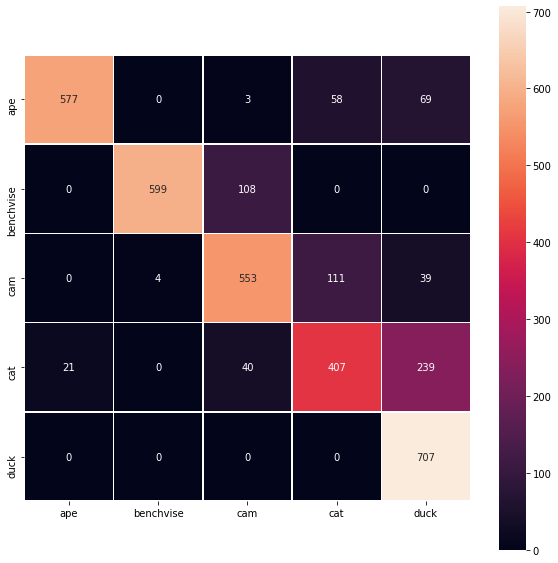

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = CNN()
model = torch.load(model_name)

db_inputs = torch.from_numpy(db_imgs).to(device, dtype=torch.float)
db_outputs = model.forward(db_inputs)

inferClass = []


for k in range(len(test_imgs)):
    img = test_imgs[k]
    label = test_labels[k]
    
    img_input = torch.from_numpy(np.expand_dims(img, axis=0)).to(device, dtype=torch.float)
    img_output = model(img_input)
    
    vec = torch.norm(db_outputs-img_output, p=2, dim=1).detach().cpu().numpy()
    ind = np.argmin(vec)
    
    inferClass.append(db_labels[ind])

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(test_labels, inferClass, labels=classes), annot=True, fmt="d", linewidth=0.5,
            square=True, xticklabels=classes, yticklabels=classes)
plt.savefig("Heat matrix", dpi=600)
